# Introduction 
The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consits of 60,000 color images of size 32 x 32 collected by by Krizhevsky, Nair, and Hinton. The dataset has 10 classes, each class having 6,000 images which is divided in to two groups: 
* Training: 50,000 images 
* Testing: 10,000 images 


The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

In the following, you will apply different algorithms to the task of object recognition in the images of the aforementioned dataset. Above each cell is a text file with a task for you to complete. 





Importing required packages

In [1]:
import os
import pickle
from collections import Counter

import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras import Input, Model, layers, losses, callbacks, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

* Load the data, rescale it and split it into training (train_size=10000), validation (train_size=1000) and test set (train_size=1000)
* Print the shape of your training set
* Print the number of samples in each class
* Compute the mean and standard deviation of your training and test set

In [13]:
# Code for loading the data 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Classes (are given)
classes = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

# Code for rescaling the images
train_images, test_images = train_images/255.0, test_images/255.0

# Code for splitting the data into train/val/test set 
Xtrain_, Xrest_, Ytrain, Yrest_ = train_test_split(train_images, train_labels, train_size=10000) 
Xval_, Xrest_, Yval, Yrest_ = train_test_split(Xrest_, Yrest_, train_size=1000)
Xtest_, Xrest_, Ytest, Yrest_ = train_test_split(Xrest_, Yrest_, train_size=10000)

# Code for printing the shape of your training set 
print("Shape of training set", train_images.shape)

# Code for printing the # of samples in each class 
print(Counter(np.squeeze(train_labels)))

# Code for computing the mean and std of the training and test set
print("Mean {} and Std {} of train set". format(round(np.mean(train_images),2), round(np.std(train_images),2)))
print("Mean {} and Std {} of test set". format(round(np.mean(test_images),2), round(np.std(test_images),2)))


Shape of training set (50000, 32, 32, 3)
Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})
Mean 0.47 and Std 0.25 of train set
Mean 0.48 and Std 0.25 of test set


Plot a 10 x 10 grid with some random data points, each row representing one of the 10 classes with 10 images from that class.

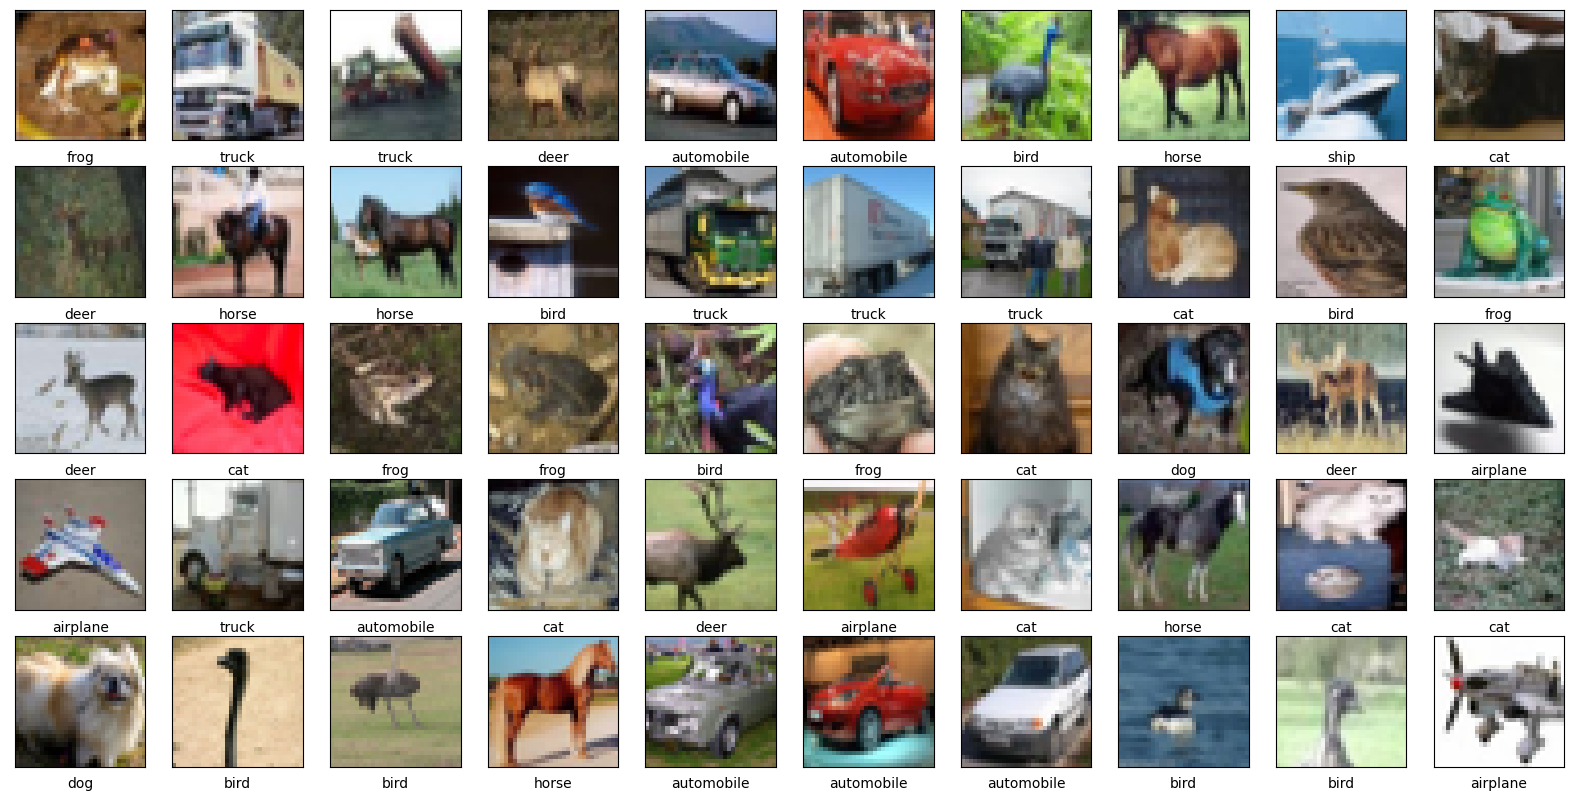

In [3]:
# Code for plotting 
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(classes[train_labels[i][0]])
plt.show()
    

Use the convnet from first notebook (Convolutional Neural Network in tensorflow using keras API cell) and train on cifar-10 for **100** epochs. 
* Create a checkpoint to save the best model (see [ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/))
* Use the trained model to make predictions on the test data
* Print the **classification_report**
* Print the **confusion_matrix**
* Plot training loss vs. validation loss
* Plot training accuracy vs. validation accuracy 


In [4]:
# Code for training on Cifar-10

def cifar_clf(input_shape=(32,32,3), n_classes=10):
    inx = Input(input_shape)
    x = layers.Conv2D(32, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(inx)
    x = layers.Conv2D(64, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(n_classes)(x)
    return Model(inx, x)

clf_cifar = cifar_clf()
clf_cifar.summary()

# select loss function and optimizer
loss = losses.SparseCategoricalCrossentropy(from_logits=True)
opt = optimizers.Nadam(learning_rate=1e-2)
clf_cifar.compile(loss=loss, 
                  optimizer=opt, 
                  metrics=['accuracy'], )

# callback for saving model
MdlCpt = callbacks.ModelCheckpoint("cpt/Convnet_cifar10.hdf5", save_best_only=True)

hist = clf_cifar.fit(train_images, 
                     train_labels,
                     epochs=100,
                     batch_size=256,
                     shuffle=True,
                     callbacks=[MdlCpt],
                     validation_data=(test_images, test_labels))


Metal device set to: Apple M1 Pro
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)           

2022-11-04 08:37:55.029783: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-04 08:37:55.029932: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2022-11-04 08:37:55.615190: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-04 08:37:55.942551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 2.3379 - accuracy: 0.1000

2022-11-04 08:38:01.420980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 6s 27ms/step - loss: 2.3379 - accuracy: 0.1000 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 2/100
196/196 [==============================] - 5s 26ms/step - loss: 2.3177 - accuracy: 0.1194 - val_loss: 2.2796 - val_accuracy: 0.1232
Epoch 3/100
196/196 [==============================] - 5s 26ms/step - loss: 2.0817 - accuracy: 0.2492 - val_loss: 1.8290 - val_accuracy: 0.3314
Epoch 4/100
196/196 [==============================] - 5s 26ms/step - loss: 1.7031 - accuracy: 0.3901 - val_loss: 1.7552 - val_accuracy: 0.3854
Epoch 5/100
196/196 [==============================] - 5s 26ms/step - loss: 1.5434 - accuracy: 0.4478 - val_loss: 1.6595 - val_accuracy: 0.4181
Epoch 6/100
196/196 [==============================] - 5s 26ms/step - loss: 1.4489 - accuracy: 0.4811 - val_loss: 1.4266 - val_accuracy: 0.4960
Epoch 7/100
196/196 [==============================] - 5s 26ms/step - loss: 1.3783 - accuracy: 0.5077 - val_loss: 1.4143 - val_accuracy: 0.4925
Epoc

In [5]:
# Code for prediction 
image_pred = tf.argmax(clf_cifar(test_images), axis=-1)

In [6]:
# Code for classification report and confusion matric
print(classification_report(test_labels, image_pred))
print(confusion_matrix(test_labels, image_pred))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51      1000
           1       0.54      0.55      0.54      1000
           2       0.37      0.35      0.36      1000
           3       0.34      0.24      0.28      1000
           4       0.43      0.34      0.38      1000
           5       0.37      0.41      0.39      1000
           6       0.48      0.56      0.52      1000
           7       0.49      0.50      0.49      1000
           8       0.56      0.61      0.59      1000
           9       0.49      0.51      0.50      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000

[[526  41  82  24  35  37  32  28 132  63]
 [ 46 550  15  21  14  21  33  23  88 189]
 [ 75  25 355  71 102 122 100  77  37  36]
 [ 45  40 102 245  72 209 126  79  35  47]
 [ 54  16 140  59 345  79 148 115  29  15]
 [ 38  19  82 143  73 410 

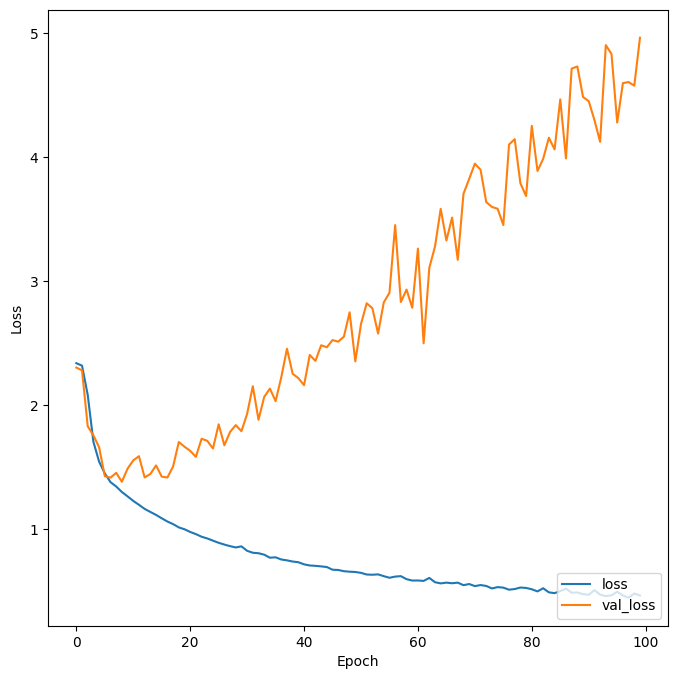

In [7]:
# Code for training loss vs. val loss
fig = plt.figure(figsize=(8,8))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

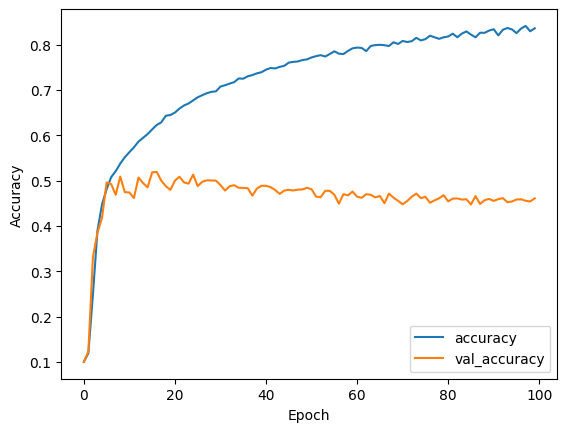

In [8]:
# Code for training acc vs. val acc
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

Use your trained convnet as a feature extractor and feed the output of the flattened layer into a **Support Vector Machine**, which now acts as a classification head (fit an SVC to your training data). Then use the fitted SVC to make predictions on your test data. Print its classification report and the confusion matrix. 

In [14]:
# Code for the conv feature extractor + SCV classifier
new_model = tf.keras.models.load_model('cpt/Convnet_cifar10.hdf5')
new_model.summary()
vector = new_model.get_layer("flatten").output
feature_extractor = tf.keras.Model(new_model.input, vector)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 10)                1290  

In [15]:
features_set = feature_extractor.predict(train_images)

 107/1563 [=>............................] - ETA: 2s

2022-11-04 12:29:13.565723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 2s 1ms/step


In [22]:
train_X, train_Y = features_set[:1000], train_labels[:1000]
test_X, test_Y = features_set[1500:1700], train_labels[1500:1700]

In [23]:
clf_svm = SVC(C=1.0, kernel="linear", gamma='auto')
clf_svm.fit(train_X, train_Y)

/Users/vishy/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto', kernel='linear')

In [24]:
# Code for making predictions
y_pred = clf_svm.predict(test_X)

In [25]:
# Code for printing classification report and confusion matrix
print(classification_report(test_Y, y_pred))
print(confusion_matrix(test_Y, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.42      0.37        19
           1       0.48      0.54      0.51        24
           2       0.27      0.15      0.19        20
           3       0.31      0.42      0.36        19
           4       0.33      0.30      0.32        23
           5       0.29      0.23      0.26        22
           6       0.50      0.33      0.40        21
           7       0.35      0.40      0.38        15
           8       0.33      0.42      0.37        19
           9       0.42      0.44      0.43        18

    accuracy                           0.36       200
   macro avg       0.36      0.37      0.36       200
weighted avg       0.37      0.36      0.36       200

[[ 8  0  1  0  0  0  0  1  8  1]
 [ 1 13  0  1  0  0  1  0  4  4]
 [ 3  1  3  4  3  2  2  1  0  1]
 [ 2  0  2  8  3  2  1  0  1  0]
 [ 1  1  1  2  7  3  1  6  1  0]
 [ 1  2  3  6  3  5  0  2  0  0]
 [ 0  2  1  5  3  1  7  1  1  0]
 [ 0  0  0

Implement a NN with the following structure: 
* Input layer -> Conv block 0 -> Conv block 1 -> Conv block 2 -> Conv block 3 -> Dense layer -> Output layer 
* Conv block 0: Conv2D(32, (3,3)) -> Conv2D(32, (3,3))
* Conv block 1: Conv2D(64, (3,3)) -> Conv2D(32, (3,3))
* Conv block 2: Conv2D(128, (3,3)) -> Conv2D(32, (3,3))
* Conv block 3: Conv2D(128, (3,3)) -> Conv2D(32, (3,3))
* Padding is always '**same**', kernel_initializer is '**he_uniform**', and activation function is '**relu**' 
* Dense layer: layers.Flatten() -> layers.Dense(512, activation='relu')
* Output layer: layers.Dense(10) 

* Train this model on the cifar-10 data for 100 epochs and make predictions on the test data
* Create a checkpoint to save the best model (see [ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/))
* Print the classification report and confusion matrix
* Plot training loss vs. validation loss
* Plot Training accuracy vs. validation accuracy 
* Did the results improve in comparison to the last model? 

In [11]:
# Code for model 2 
def cifar_clf2(input_shape=(32, 32, 3), n_classes=10):
    inx = Input(input_shape)
    x = layers.Conv2D(32, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(inx)
    x = layers.Conv2D(64, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(n_classes)(x)
    return Model(inx, x)

clf_cifar2 = cifar_clf2()
clf_cifar2.summary()

# select loss function and optimizer
loss = losses.SparseCategoricalCrossentropy(from_logits=True)
opt = optimizers.Nadam(learning_rate=1e-2)
clf_cifar2.compile(loss=loss, 
                   optimizer=opt, 
                   metrics=['accuracy'] )

# callback for saving model
MdlCpt2 = callbacks.ModelCheckpoint('cpt/convnet_cifar2.hdf5', save_best_only=True)

hist2 = clf_cifar2.fit(train_images, 
                       train_labels,
                       epochs=100,
                       batch_size=256,
                       shuffle=True,
                       callbacks=[MdlCpt2],
                       validation_data=(test_images, test_labels))


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 2, 128)         147584    
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               2626

2022-11-04 08:51:46.968927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - ETA: 0s - loss: 2.2864 - accuracy: 0.1923

2022-11-04 08:51:54.294886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 8s 35ms/step - loss: 2.2864 - accuracy: 0.1923 - val_loss: 1.9467 - val_accuracy: 0.2750
Epoch 2/100
196/196 [==============================] - 6s 31ms/step - loss: 1.8583 - accuracy: 0.3247 - val_loss: 1.6799 - val_accuracy: 0.3776
Epoch 3/100
196/196 [==============================] - 6s 30ms/step - loss: 1.5693 - accuracy: 0.4248 - val_loss: 1.5423 - val_accuracy: 0.4272
Epoch 4/100
196/196 [==============================] - 6s 29ms/step - loss: 1.4417 - accuracy: 0.4764 - val_loss: 1.4792 - val_accuracy: 0.4661
Epoch 5/100
196/196 [==============================] - 6s 30ms/step - loss: 1.3523 - accuracy: 0.5106 - val_loss: 1.3965 - val_accuracy: 0.4896
Epoch 6/100
196/196 [==============================] - 6s 30ms/step - loss: 1.2759 - accuracy: 0.5370 - val_loss: 1.4077 - val_accuracy: 0.5054
Epoch 7/100
196/196 [==============================] - 6s 28ms/step - loss: 1.2133 - accuracy: 0.5622 - val_loss: 1.4662 - val_accuracy: 0.4912
Epoc

In [12]:
# Code for making predictions
image_pred = tf.argmax(clf_cifar2(test_images), axis=-1)

# Code for classification report and confusion matrix
print(classification_report(test_labels, image_pred))
print(confusion_matrix(test_labels, image_pred))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58      1000
           1       0.67      0.69      0.68      1000
           2       0.45      0.37      0.41      1000
           3       0.30      0.42      0.35      1000
           4       0.49      0.38      0.43      1000
           5       0.39      0.45      0.42      1000
           6       0.62      0.55      0.58      1000
           7       0.63      0.56      0.59      1000
           8       0.66      0.70      0.68      1000
           9       0.57      0.64      0.60      1000

    accuracy                           0.53     10000
   macro avg       0.54      0.53      0.53     10000
weighted avg       0.54      0.53      0.53     10000

[[540  46  52  60  22  22  10  16 142  90]
 [ 30 692   7  20   6  15   6   8  58 158]
 [ 59  10 373 150 107 119  78  46  32  26]
 [ 28  11  67 421  62 219  91  47   9  45]
 [ 36  11 121 138 383 103  77 100  14  17]
 [ 14   3  63 270  40 450 

Text(0.5, 0.98, 'Training progress')

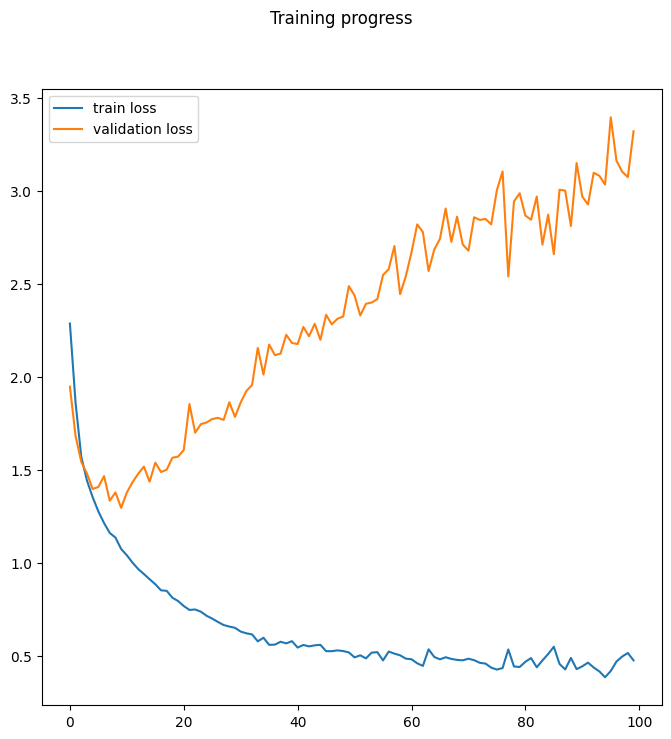

In [13]:
# Code for training loss vs. val loss
fig = plt.figure(figsize=(8,8))
plt.plot(hist2.history['loss'], label='train loss')
plt.plot(hist2.history['val_loss'], label='validation loss')
plt.legend();
fig.suptitle('Training progress')

Text(0.5, 0.98, 'Training progress')

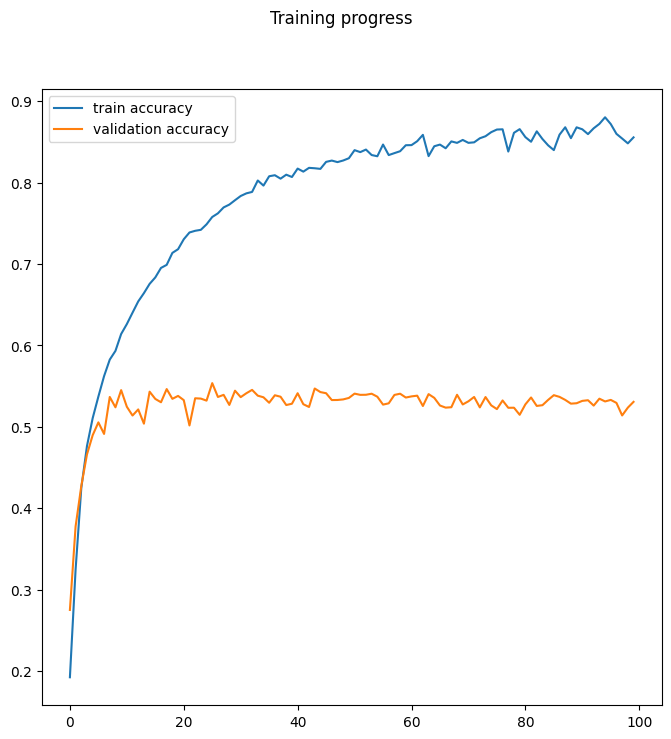

In [14]:
# Code for training acc vs. val acc
fig = plt.figure(figsize=(8,8))
plt.plot(hist2.history['accuracy'], label='train accuracy')
plt.plot(hist2.history['val_accuracy'], label='validation accuracy')
plt.legend();
fig.suptitle('Training progress')

For the above model, add a batch normalization layer **after each** Conv2D layer. 
* Batch normalization: layers.BatchNormalization()
* You should have two batch normalization layers in each Conv block
* Train this model on the cifar-10 data for 100 epochs and make predictions on the test data
* Create a checkpoint to save the best model (see [ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/))
* Print the classification report and confusion matrix
* Plot training loss vs. validation loss
* Plot Training accuracy vs. validation accuracy 
* Did the results improve in comparison to the previous two models?


In [15]:
# Code for model 3

def cifar_clf3(input_shape=(32,32,3), n_classes=10):
    inx = Input(input_shape)
    x = layers.Conv2D(32, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(inx)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(n_classes, activation='softmax')(x)
    return Model(inx, x)

clf_cifar3 = cifar_clf3()
clf_cifar3.summary()

# select loss function and optimizer
loss = losses.SparseCategoricalCrossentropy(from_logits=False)
opt = optimizers.Nadam(learning_rate=1e-2)
clf_cifar3.compile(loss=loss, 
                   optimizer=opt,
                   metrics=['accuracy'] )

# callback for saving model
MdlCpt3 = callbacks.ModelCheckpoint('cpt/convnet_cifar3.hdf5', save_best_only=True)

hist3 = clf_cifar3.fit(train_images, 
                       train_labels,
                       epochs=100,
                       batch_size=512,
                       shuffle=True,
                       callbacks=[MdlCpt3],
                       validation_data=(test_images, test_labels))


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 batch_normalization_2 (Batc  (None, 8, 8, 64)         256 

2022-11-04 09:06:28.904507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - ETA: 0s - loss: 1.6419 - accuracy: 0.4393

2022-11-04 09:06:40.198794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - 13s 86ms/step - loss: 1.6419 - accuracy: 0.4393 - val_loss: 2.3433 - val_accuracy: 0.2639
Epoch 2/100
98/98 [==============================] - 5s 54ms/step - loss: 1.0880 - accuracy: 0.6074 - val_loss: 2.3499 - val_accuracy: 0.3616
Epoch 3/100
98/98 [==============================] - 5s 55ms/step - loss: 0.8619 - accuracy: 0.6915 - val_loss: 1.3486 - val_accuracy: 0.5739
Epoch 4/100
98/98 [==============================] - 5s 56ms/step - loss: 0.6897 - accuracy: 0.7526 - val_loss: 1.1596 - val_accuracy: 0.6337
Epoch 5/100
98/98 [==============================] - 5s 55ms/step - loss: 0.5521 - accuracy: 0.8021 - val_loss: 1.1088 - val_accuracy: 0.6594
Epoch 6/100
98/98 [==============================] - 5s 54ms/step - loss: 0.4486 - accuracy: 0.8388 - val_loss: 1.2665 - val_accuracy: 0.6609
Epoch 7/100
98/98 [==============================] - 5s 53ms/step - loss: 0.3646 - accuracy: 0.8696 - val_loss: 1.3621 - val_accuracy: 0.6583
Epoch 8/100
98/98

In [16]:
# Code for making predictions
image_pred = tf.argmax(clf_cifar3(test_images), axis=-1)

# Code for classification report and confusion matrix
print(classification_report(test_labels, image_pred))
print(confusion_matrix(test_labels, image_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1000
           1       0.79      0.84      0.81      1000
           2       0.56      0.61      0.59      1000
           3       0.53      0.43      0.47      1000
           4       0.62      0.58      0.60      1000
           5       0.56      0.61      0.59      1000
           6       0.64      0.83      0.73      1000
           7       0.79      0.69      0.74      1000
           8       0.85      0.76      0.80      1000
           9       0.84      0.74      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

[[768  23  61  14  23  10  16  13  47  25]
 [ 26 838   9   6  10   7  18   3  22  61]
 [ 60  10 614  48  72  64  87  28   9   8]
 [ 26  12 101 426  63 191 119  42   9  11]
 [ 18   5 123  48 579  64 109  44   6   4]
 [ 17   4  66 148  52 614 

Text(0.5, 0.98, 'Training progress')

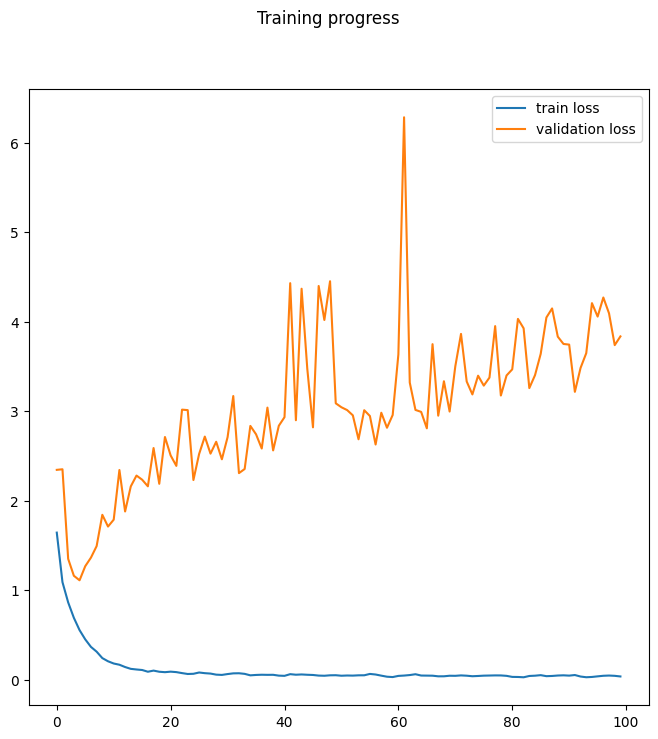

In [17]:
# Code for training loss vs. val loss
fig = plt.figure(figsize=(8,8))
plt.plot(hist3.history['loss'], label='train loss')
plt.plot(hist3.history['val_loss'], label='validation loss')
plt.legend();
fig.suptitle('Training progress')

Text(0.5, 0.98, 'Training progress')

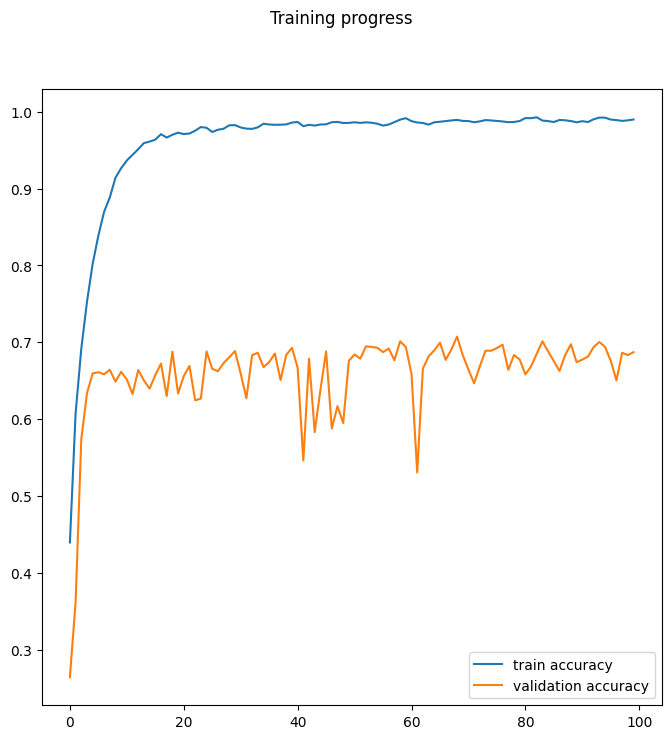

In [18]:
# Code for training acc vs. val acc
fig = plt.figure(figsize=(8,8))
plt.plot(hist3.history['accuracy'], label='train accuracy')
plt.plot(hist3.history['val_accuracy'], label='validation accuracy')
plt.legend();
fig.suptitle('Training progress')

Apply the following changes to the previous model: 
* In Conv block 0: add a Dropout layer with a rate of 0.1 after the second batch normalization layer 
* In Conv block 1: add a Dropout layer with a rate of 0.2 after the second batch normalization layer
* In Conv block 2: add a Dropout layer with a rate of 0.3 after the second batch normalization layer
* In Conv block 3: add a Dropout layer with a rate of 0.4 after the second batch normalization layer
* Add a Dropout layer after the Dense layer with rate 0.5 
* Dropout layer: layers.Dropout(rate)
* Train this model on the cifar-10 data for 100 epochs and make predictions on the test data
* Create a checkpoint to save the best model (see [ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/))
* Print the classification report and confusion matrix
* Plot training loss vs. validation loss
* Plot Training accuracy vs. validation accuracy 
* Did the results improve in comparison to the previous models?



In [19]:
# Code for model 4 
def cifar_clf4(input_shape=(32,32,3), n_classes=10):
    inx = Input(input_shape)
    x = layers.Conv2D(32, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(inx)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.1)(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.2)(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.3)(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.4)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(rate=0.5)(x)
    x = layers.Dense(n_classes, activation='softmax')(x)
    return Model(inx, x)

clf_cifar4 = cifar_clf4()
clf_cifar4.summary()

# select loss function and optimizer
loss = losses.SparseCategoricalCrossentropy(from_logits=False)
opt = optimizers.Nadam(learning_rate=1e-2)
clf_cifar4.compile(loss=loss,
                   optimizer=opt,
                   metrics=['accuracy'] )

# callback for saving model
MdlCpt4 = callbacks.ModelCheckpoint('cpt/convnet_cifar4.hdf5', save_best_only=True)

hist4 = clf_cifar4.fit(train_images, 
                       train_labels,
                       epochs=100,
                       batch_size=512,
                       shuffle=True,
                       callbacks=[MdlCpt4],
                       validation_data=(test_images, test_labels))


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 batch_normalization_9 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 64)          1849

2022-11-04 09:15:53.057165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - ETA: 0s - loss: 1.8394 - accuracy: 0.3673

2022-11-04 09:16:03.000994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - 11s 81ms/step - loss: 1.8394 - accuracy: 0.3673 - val_loss: 1.9314 - val_accuracy: 0.3182
Epoch 2/100
98/98 [==============================] - 5s 56ms/step - loss: 1.4416 - accuracy: 0.4819 - val_loss: 2.0344 - val_accuracy: 0.2989
Epoch 3/100
98/98 [==============================] - 6s 57ms/step - loss: 1.2842 - accuracy: 0.5445 - val_loss: 1.6934 - val_accuracy: 0.3984
Epoch 4/100
98/98 [==============================] - 5s 55ms/step - loss: 1.1861 - accuracy: 0.5783 - val_loss: 1.5231 - val_accuracy: 0.4711
Epoch 5/100
98/98 [==============================] - 5s 54ms/step - loss: 1.1000 - accuracy: 0.6103 - val_loss: 1.5626 - val_accuracy: 0.4654
Epoch 6/100
98/98 [==============================] - 5s 56ms/step - loss: 1.0337 - accuracy: 0.6341 - val_loss: 1.4578 - val_accuracy: 0.4811
Epoch 7/100
98/98 [==============================] - 5s 54ms/step - loss: 0.9835 - accuracy: 0.6504 - val_loss: 1.6418 - val_accuracy: 0.4721
Epoch 8/100
98/98

In [20]:
# Code for making predictions
image_pred = tf.argmax(clf_cifar4(test_images), axis=-1)

# Code for classification report and confusion matrix
print(classification_report(test_labels, image_pred))
print(confusion_matrix(test_labels, image_pred))

              precision    recall  f1-score   support

           0       0.78      0.06      0.12      1000
           1       0.96      0.03      0.05      1000
           2       0.16      0.88      0.27      1000
           3       0.14      0.01      0.02      1000
           4       0.21      0.05      0.08      1000
           5       0.00      0.00      0.00      1000
           6       0.20      0.74      0.31      1000
           7       1.00      0.01      0.01      1000
           8       0.59      0.14      0.23      1000
           9       1.00      0.01      0.01      1000

    accuracy                           0.19     10000
   macro avg       0.50      0.19      0.11     10000
weighted avg       0.50      0.19      0.11     10000

[[ 63   0 743   1   7   0 137   0  49   0]
 [  6  27 503   6  35   0 382   0  41   0]
 [  0   0 881   0   2   0 116   0   1   0]
 [  0   0 497  12   8   0 483   0   0   0]
 [  0   0 608   3  46   0 343   0   0   0]
 [  2   0 548  23   6   0 

/Users/vishy/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vishy/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vishy/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 0.98, 'Training progress')

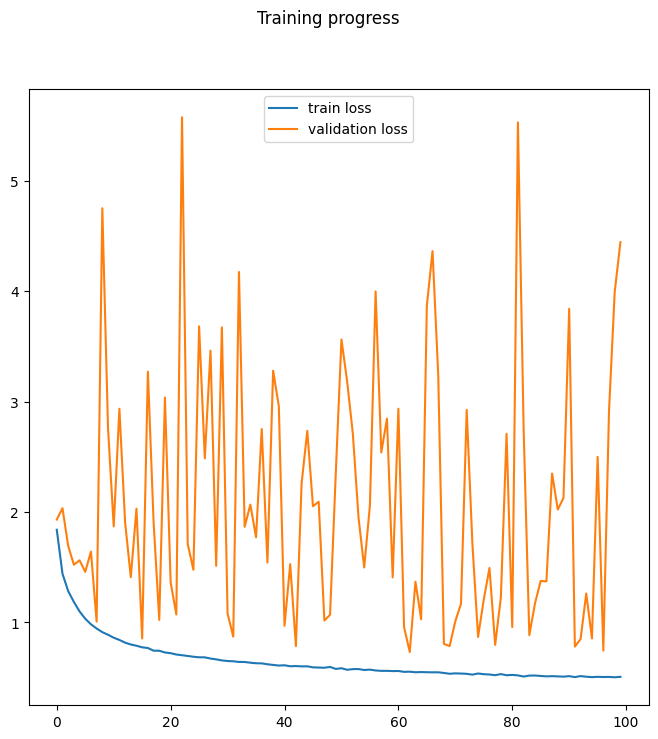

In [21]:
# Code for training loss vs. val loss
fig = plt.figure(figsize=(8,8))
plt.plot(hist4.history['loss'], label='train loss')
plt.plot(hist4.history['val_loss'], label='validation loss')
plt.legend();
fig.suptitle('Training progress')

Text(0.5, 0.98, 'Training progress')

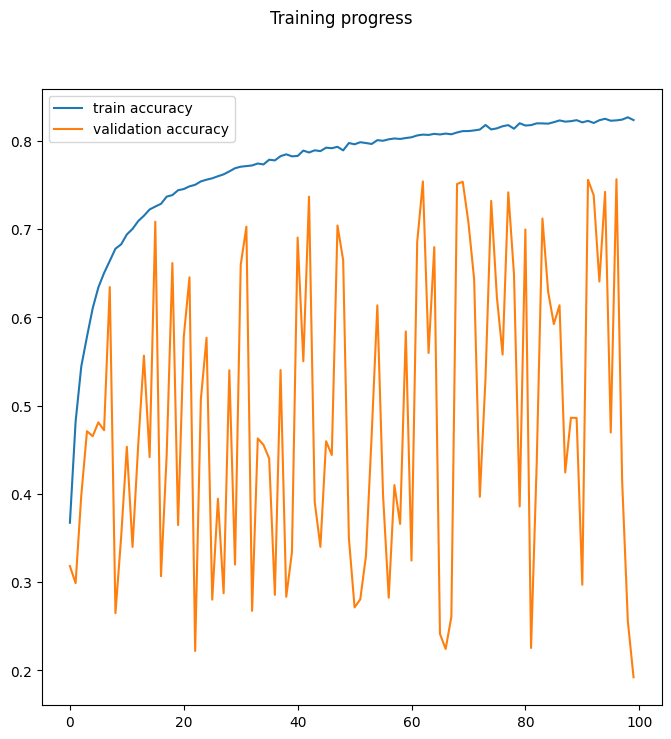

In [22]:
# Code for training acc vs. val acc
fig = plt.figure(figsize=(8,8))
plt.plot(hist4.history['accuracy'], label='train accuracy')
plt.plot(hist4.history['val_accuracy'], label='validation accuracy')
plt.legend();
fig.suptitle('Training progress')

Apply [image augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) to the previous model. You can use random translation, random flip, and random rotation. 
* Train this model on the cifar-10 data for 200 epochs and make predictions on the test data
* Create a checkpoint to save the best model (see [ModelCheckpoint](https://keras.io/api/callbacks/model_checkpoint/))
* Print the classification report and confusion matrix
* Plot training loss vs. validation loss
* Plot Training accuracy vs. validation accuracy 
* Did the results improve in comparison to the previous models?

In [23]:
# Code for image augmentation + the rest of the tasks mentioned above
# Code for model 5
def cifar_clf5(input_shape=(32,32,3), n_classes=10):
    inx = Input(input_shape)
    x = layers.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode="wrap")(inx)
    x = layers.RandomFlip("horizontal_and_vertical")(x)
    x = layers.RandomRotation(0.2)(x)
    x = layers.Conv2D(32, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.1)(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.2)(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.3)(x)
    x = layers.Conv2D(128, kernel_size=(3, 3), strides=2, padding='same', kernel_initializer='he_uniform', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.4)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(rate=0.5)(x)
    x = layers.Dense(n_classes, activation='softmax')(x)
    return Model(inx, x)

clf_cifar5 = cifar_clf5()
clf_cifar5.summary()

# select loss function and optimizer
loss = losses.SparseCategoricalCrossentropy(from_logits=False)
opt = optimizers.Nadam(learning_rate=1e-2)
clf_cifar5.compile(loss=loss, 
                   optimizer=opt, 
                   metrics=['accuracy'] )

# callback for saving model
MdlCpt5 = callbacks.ModelCheckpoint('cpt/convnet_cifar5.hdf5', save_best_only=True)

hist5 = clf_cifar5.fit(train_images,
                       train_labels,
                       epochs=200,
                       batch_size=512,
                       shuffle=True,
                       callbacks=[MdlCpt5],
                       validation_data=(test_images, test_labels))


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 random_translation (RandomT  (None, 32, 32, 3)        0         
 ranslation)                                                     
                                                                 
 random_flip (RandomFlip)    (None, 32, 32, 3)         0         
                                                                 
 random_rotation (RandomRota  (None, 32, 32, 3)        0         
 tion)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 32)        896       
                                                                 
 batch_normalization_16 (Bat  (None, 16, 16, 32)       128 

2022-11-04 09:30:32.678303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/98 [==>...........................] - ETA: 1:51:02 - loss: 3.1482 - accuracy: 0.1574

KeyboardInterrupt: 

bug: https://github.com/keras-team/keras-cv/issues/581
slow down the training process 6th fold<br>
issues with image augumentation with tensorflow 2.9 version (latest)

In [24]:
# Code for making predictions
image_pred = tf.argmax(clf_cifar5(test_images), axis=-1)

# Code for classification report and confusion matrix
print(classification_report(test_labels, image_pred))
print(confusion_matrix(test_labels, image_pred))

              precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.12      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.02      0.10      0.02     10000
weighted avg       0.02      0.10      0.02     10000

[[ 998    0    0    0    0    0    0    0    2    0]
 [ 996    0    0    0    0    1    0    0    3    0]
 [ 998    0    0    0    0    2    0    0    0    0]
 [ 997    0    0    0    0    0    0    0    1    2]
 [ 997    0    0    0    0   

/Users/vishy/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vishy/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vishy/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Code for training loss vs. val loss
fig = plt.figure(figsize=(8,8))
plt.plot(hist5.history['loss'], label='train loss')
plt.plot(hist5.history['val_loss'], label='validation loss')
plt.legend();
fig.suptitle('Training progress')

In [ ]:
# Code for training acc vs. val acc
fig = plt.figure(figsize=(8,8))
plt.plot(hist5.history['accuracy'], label='train accuracy')
plt.plot(hist5.history['val_accuracy'], label='validation accuracy')
plt.legend();
fig.suptitle('Training progress')

 Create 3D scatter plots (per class) of the first 3 principal components on:
 * Raw images 
 * Simple Convnet features
 * Features of the best performing model 

 Describe your observation from the three plots


In [ ]:
# Code for the three different 3D scatter plots 
